# Step1. Import all important libraries and dataset

In [1]:
# Import all the necessary libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set a path string

path=r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 4\Instacart Basket Analysis"


In [3]:
# Import the dataset all_data_combined.pkl as all_data_combined

all_data_combined=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_data_combined.pkl'))

# Step 2 Create charts

### Bar chart 

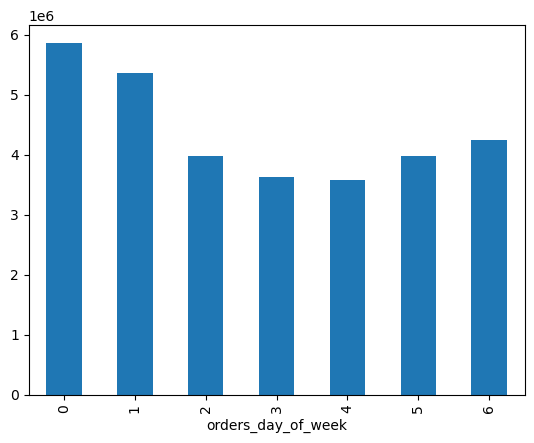

In [4]:
# Creat a bar chart

bar= all_data_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()



In [5]:
# Exporting the 'bar' object created above to the 'visualizations' folder

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

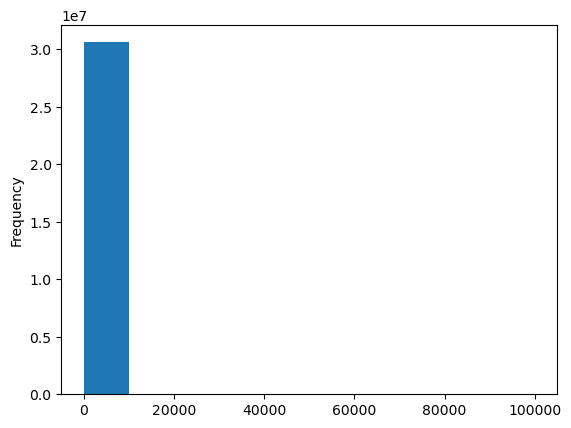

In [6]:

# Creating a histogram for the 'prices' column

all_data_combined['prices'].plot.hist(bins=10)

<Axes: xlabel='prices', ylabel='prices'>

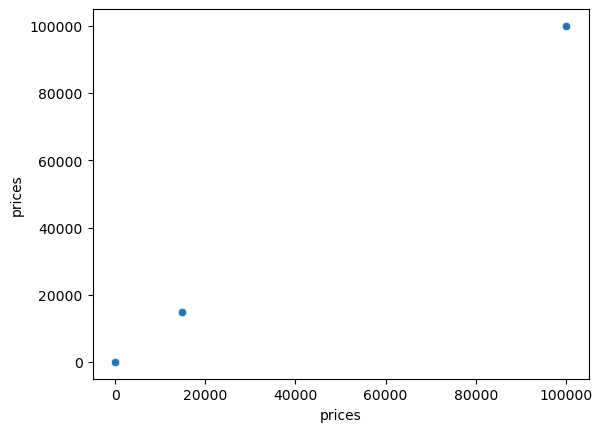

In [7]:
# Creating a scatter plot of the 'prices' column to explor outliers

sns.scatterplot(x='prices', y='prices', data=all_data_combined)

In [8]:
# Identifying records with outliers (above an expected value for example 100)

all_data_combined.loc[all_data_combined['prices'] > 100]

,user_id,orders_day_of_week,hour_at_time_of_order,prices,price_range_loc,busiest_day,busiest_days,busiest_periods_of_day,loyalty_flag,avg_spending,spending_flag,order_flag,state,age,date_joined,n_dependants,fam_status,income,_merge
7680,1519,2,11,14900.0,High-range product,Regularly busy,Regularly days,Most orders,Loyal customer,50.93750,High spender,Frequent customer,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7681,1519,3,10,14900.0,High-range product,Regularly busy,Slowest days,Most orders,Loyal customer,50.93750,High spender,Frequent customer,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15000,2409,1,19,14900.0,High-range product,Regularly busy,Busiest days,Most orders,Loyal customer,35.21875,High spender,Frequent customer,Hawaii,55,11/11/2018,2,married,230074,both
19871,3531,2,19,99999.0,High-range product,Regularly busy,Regularly days,Most orders,Regular customer,267.50000,High spender,Frequent customer,Hawaii,80,10/6/2019,2,married,233776,both
20104,3793,2,9,14900.0,High-range product,Regularly busy,Regularly days,Most orders,Regular customer,71.18750,High spender,Frequent customer,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30515866,106089,5,17,99999.0,High-range product,Regularly busy,Regularly days,Most orders,New customer,6256.00000,High spender,Frequent customer,District of Columbia,57,4/3/2019,1,married,215116,both
30538702,131671,4,9,99999.0,High-range product,Least busy,Slowest days,Most orders,Regular customer,3454.00000,High spender,Regular customer,Rhode Island,35,8/4/2018,0,single,86490,both
30541263,39667,2,15,99999.0,High-range product,Regularly busy,Regularly days,Most orders,New customer,1224.00000,High spender,Non-frequent customer,Rhode Island,78,5/8/2019,2,married,195077,both
30559095,95105,4,19,99999.0,High-range product,Least busy,Slowest days,Most orders,New customer,11776.00000,High spender,Frequent customer,South Carolina,48,1/18/2017,2,married,398880,both


In [9]:
# Turning oulier values into NaN(missing)

all_data_combined.loc[all_data_combined['prices'] >100, 'prices'] = np.nan

In [10]:
# Check the max value to crosscheck if outliers are all removed

all_data_combined['prices'].max()

25.0

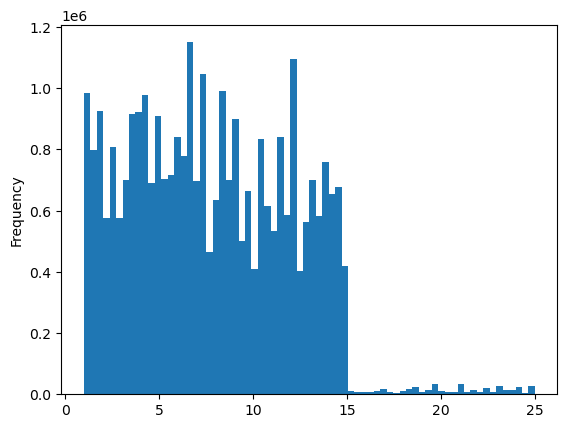

In [11]:
# Creating a histogram for the 'prices' column ( now with a clean data)

hist=all_data_combined['prices'].plot.hist(bins=70)

In [12]:
# Exporting the 'hist' object created above to the 'visualizations' folder

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price.png'))

### Line chart

In [14]:
# Creating a subset of data through sampling technique (otherwise we will face memory issue with the current big data set). First step is to set the seed for the random number generator

np.random.seed(4)

In [15]:
# Creat a list holding True/False values to the test np.random.rant()<=0.7

dev = np.random.rand(len(all_data_combined)) <= 0.7

In [16]:
# Store 70% of the sample in the dataframe big

big = all_data_combined[dev]

In [17]:
# Store 30% of the dataframe in the dataframe small

small = all_data_combined[~dev]

In [18]:
 # Cheak the new dataframes to see if sunsetting was successful. W/r the sum of rows of the two new dataframe is equal to the original one

len(all_data_combined)

30629741

In [19]:
len(big)+len(small)

30629741

In [20]:
# To speed up the process filter only those important columns (i.e., 'prices' and 'orders_day_of_week' columns)

df_2 = small[['orders_day_of_week','prices']]

NotImplementedError: float16 indexes are not supported

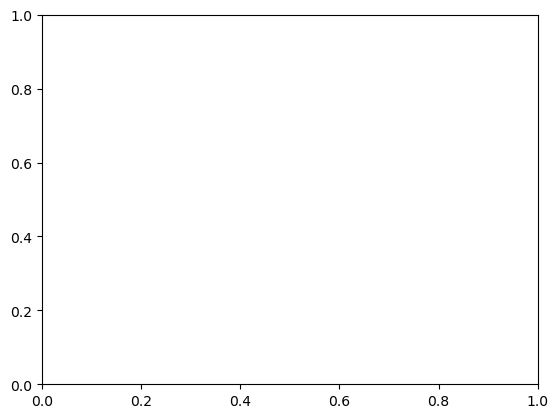

In [21]:
# Create a line chart from the df_2 dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [17]:
all_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 19 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   orders_day_of_week      int8    
 2   hour_at_time_of_order   int8    
 3   prices                  float64 
 4   price_range_loc         object  
 5   busiest_day             object  
 6   busiest_days            object  
 7   busiest_periods_of_day  object  
 8   loyalty_flag            object  
 9   avg_spending            float16 
 10  spending_flag           object  
 11  order_flag              object  
 12  state                   object  
 13  age                     int64   
 14  date_joined             object  
 15  n_dependants            int64   
 16  fam_status              object  
 17  income                  int64   
 18  _merge                  category
dtypes: category(1), float16(1), float64(1), int64(3), int8(2), object(11)
memory usage

# Step4 Create a histogram of order_hour_of_day column

<Axes: ylabel='Frequency'>

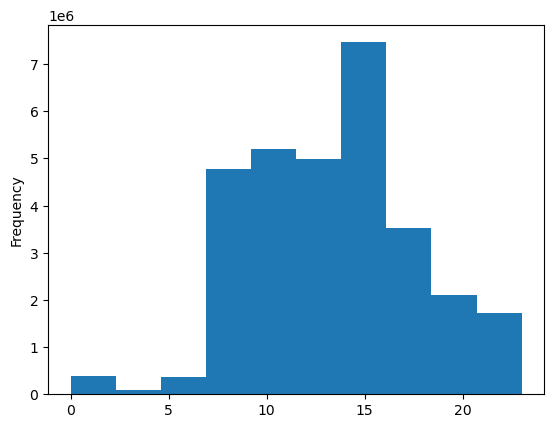

In [18]:
# Creating a histogram for the 'hour_at_time_of_order' column

all_data_combined['hour_at_time_of_order'].plot.hist(bins=10)


The histogram demostrate that the majority of orders are placed around 15:00 hour.

In [19]:
# Exporting the 'hist' object created above to the 'visualizations' folder

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_at_time_of_order.png'))

# Step4. Create a bar chart of loyality_flag column

In [20]:
all_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30629741 entries, 0 to 30629740
Data columns (total 19 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   orders_day_of_week      int8    
 2   hour_at_time_of_order   int8    
 3   prices                  float64 
 4   price_range_loc         object  
 5   busiest_day             object  
 6   busiest_days            object  
 7   busiest_periods_of_day  object  
 8   loyalty_flag            object  
 9   avg_spending            float16 
 10  spending_flag           object  
 11  order_flag              object  
 12  state                   object  
 13  age                     int64   
 14  date_joined             object  
 15  n_dependants            int64   
 16  fam_status              object  
 17  income                  int64   
 18  _merge                  category
dtypes: category(1), float16(1), float64(1), int64(3), int8(2), object(11)
memory usage

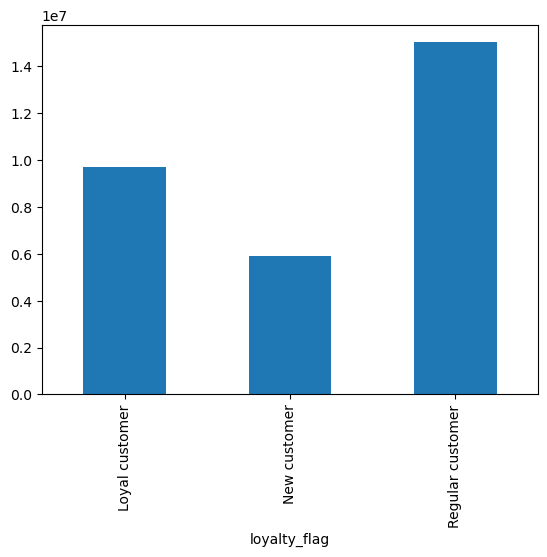

In [22]:
# Creat a bar chart

bar= all_data_combined['loyalty_flag'].value_counts().sort_index().plot.bar()

In [ ]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# Step5. Check whether there’s a difference in expenditure

In [23]:
# Creating a subset of data through sampling technique (otherwise we will face memory issue with the current big data set). First step is to set the seed for the random number generator

np.random.seed(4)

In [24]:
# Creat a list holding True/False values to the test np.random.rant()<=0.7

dev = np.random.rand(len(all_data_combined)) <= 0.7

In [25]:
# Store 70% of the sample in the dataframe big

big = all_data_combined[dev]

In [26]:
# Store 30% of the dataframe in the dataframe small

small = all_data_combined[~dev]

In [27]:
 # Check the new dataframes to see if sunsetting was successful. W/r the sum of rows of the two new dataframe is equal to the original one

len(all_data_combined)

30629741

In [28]:
len(big)+len(small)

30629741

In [29]:
# To speed up the process filter only those important columns (i.e., 'prices' and 'orders_day_of_week' columns)

df_2 = small[['hour_at_time_of_order','prices']]

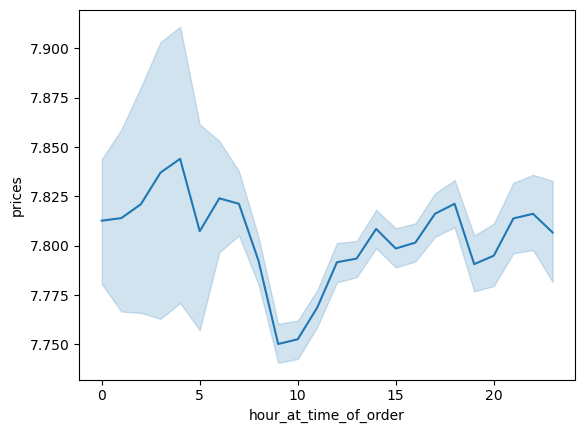

In [30]:
# Create a line chart from the df_2 dataframe

line = sns.lineplot(data = df_2, x = 'hour_at_time_of_order',y = 'prices')

In [ ]:
# Export the visualization

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_at_time_of_order_prices.png'))

# Step6. Determine whether there’s a connection between age and family situation 

In [31]:
# Creating a subset of data through sampling technique (otherwise we will face memory issue with the current big data set). First step is to set the seed for the random number generator

np.random.seed(4)

In [32]:
# Create a list holding True/False values to the test np.random.rant()<=0.7

dev = np.random.rand(len(all_data_combined)) <= 0.7

In [33]:
# Store 70% of the sample in the dataframe big

big = all_data_combined[dev]

In [34]:
# Store 30% of the dataframe in the dataframe small

small = all_data_combined[~dev]

In [35]:
 # Check the new dataframes to see if sunsetting was successful. W/r the sum of rows of the two new dataframe is equal to the original one

len(all_data_combined)

30629741

In [36]:
# To speed up the process filter only those important columns (i.e., 'prices' and 'orders_day_of_week' columns)

df_2 = small[['age','n_dependants']]

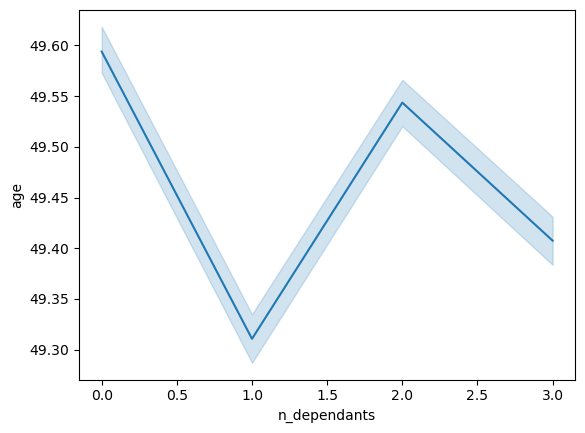

In [37]:
# Create a line chart from the df_2 dataframe

line = sns.lineplot(data = df_2, x = 'n_dependants',y = 'age')

The line chart shows that the relationship between n_dependents and age is not linear.

In [38]:
# Exporting the 'line' object created above to the 'visualizations' folder

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_n_dependent_age.png'))

# Step7: explore whether there’s a connection between age and spending power (income)

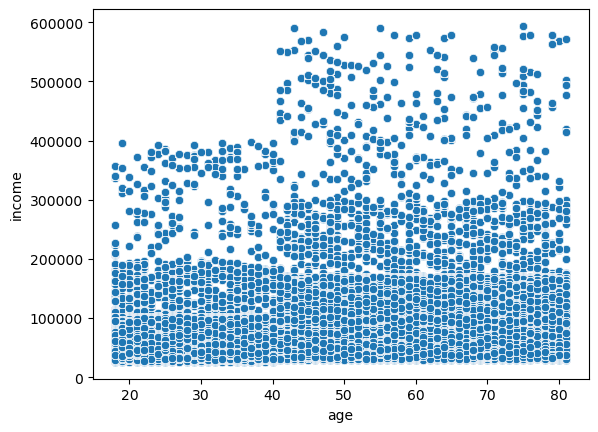

In [39]:
# Creating a scatter plot

scatter=sns.scatterplot(x='age', y='income', data=all_data_combined)

The scatterplot suggest that there is no strong relationship between age and income 

In [40]:
# Export the visualization

scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))